#  NKI (Netherlands Cancer Institute) Breast Cancer Data Study
>> * AUTHOR : KRASHNA GURME
>> * DATE : 27 March, 2021

## NKI Breast Cancer Data

# 1. Objectives
* a. Write a brief note on the dataset and the research work from where this dataset originates. We expect no exploratory analysis.
* b. How do you think the creators of this dataset have calculated the values in column 17 to 1554? And what does the column names mean? Write a brief explanation based on your understanding and study.

* a. *The dataset is of breast cancer patients as name suggests NKI Breast Cancer Dataset. Which contains data of 272 patients. 1570 Features meaning each individual patient's 1570 different characteristics/values/features/attributes. The origin of dataset maybe from some institute/hospital which treats or handles or study breast cancer patients. The firm might be looking into patients different attributes so as to understand more closely the patient as well as the cancer of them. Using various numbers of their different body tests, whcih can significantly contributes into the cancer severity or patient chances of survival or death. Also, this data contains information about how patient are treated, their various symtoms level, their survival rate with respect to their other characteristics which actually decides whether they will live or not. Next, it contains the information about their genes, and their indicators level. Such as, whether person posses good gene indicators or  poor gentic indicators. Having said that, this data contains info of patients who's having very different gentic order, whcih actully help them to survive besides of thier bad genetic order.* 

* b. *The data in columns 17 to 1554 might be highthroughput
microarray data, which senses various data points from the patients monitoring medical devices. Or the information is made from the various reports of patients which includes very depth information about each different parts, which signifies the cancer. The data may contain the genetic characteristic of patient. TO proceed into more detal way to treat someone, or more advanced medical treatment for cancer.* 

In [1]:
import pandas as pd

In [4]:
# Importing/uploading dataset file into Google Colaboratory.
from google.colab import files
uploaded = files.upload()

Saving NKI_cleaned.csv to NKI_cleaned.csv


In [5]:
# storing dataset into pandas dataframe 
import io
data_raw = pd.read_csv(io.BytesIO(uploaded['NKI_cleaned.csv']))

In [6]:
# importing necessary packages 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns  
from sklearn.model_selection import train_test_split
import yellowbrick as yb

pd.set_option('display.max_columns', None)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [7]:
raw_data = data_raw
data_raw.head(5)

Patient  ID  age  eventdeath   survival  timerecurrence  chemo  hormonal  \
0    s122  18   43           0  14.817248       14.817248      0         0   
1    s123  19   48           0  14.261465       14.261465      0         0   
2    s124  20   38           0   6.644764        6.644764      0         0   
3    s125  21   50           0   7.748118        7.748118      0         1   
4    s126  22   38           0   6.436687        6.318960      0         0   

   amputation  histtype  diam  posnodes  grade  angioinv  lymphinfil  barcode  \
0           1         1    25         0      2         3           1     6274   
1           0         1    20         0      3         3           1     6275   
2           0         1    15         0      2         1           1     6276   
3           0         1    15         1      2         3           1     6277   
4           1         1    15         0      2         2           1     6278   

       esr1  G3PDH_570  Contig45645_RC  Contig44916_RC    D25272    J00129  \
0 -0.413955  -0.954246        0.051024       -0.111203 -0.050066 -0.340897   
1  0.195251   0.244626       -0.199602       -0.111397 -0.135207  0.026813   
2  0.596177   0.082434       -0.156199       -0.084980 -0.179003 -0.490377   
3  0.501286  -1.071614       -0.206041       -0.051775 -0.049676 -0.306176   
4 -0.066771  -0.982276       -0.514666       -0.118483 -0.086523 -0.377659   

   Contig29982_RC  Contig56678_RC  Contig53047_RC  Contig19551  \
0       -0.038770       -0.104256       -0.485671    -0.565482   
1       -0.165675        0.081549       -0.736914     0.118127   
2       -0.193691        0.186532       -0.801328     0.128750   
3        0.061596        0.115982       -0.842997    -0.020820   
4       -0.093353        0.302795       -0.794573    -0.001558   

   Contig47230_RC  Contig46501_RC  Contig20749_RC  AL157500  AL157502  \
0        0.159871        0.198546        0.131750  0.600214  0.034498   
1       -0.183824        0.265609       -0.080799 -0.034788  0.146600   
2        0.403489        0.161287        0.030411 -0.074798 -0.190267   
3       -0.189779       -0.003238        0.450045 -0.024921 -0.187729   
4       -0.210314        0.046650       -0.151043 -0.016541 -0.168022   

   Contig37376_RC  Contig45395_RC    X98307  AL157505  AB033027  \
0        0.492915        0.032284  0.020498  0.162939 -0.026182   
1        0.096864        0.043611  0.049600  0.150307 -0.150096   
2        0.111516       -0.212994 -0.083166  0.363167 -0.202888   
3        0.012188       -0.110403 -0.036232 -0.014174 -0.192298   
4        0.048334       -0.049165 -0.060926 -0.060485 -0.061257   

   Contig24026_RC  Contig27800_RC  Contig42500_RC  Contig7147  Contig32037_RC  \
0        0.090109       -0.110716        0.025322    0.690928        0.764825   
1       -0.082436       -0.117535       -0.245531   -0.070265        0.046395   
2        0.037665       -0.061916        0.082368    0.048723       -0.030065   
3       -0.116583       -0.117127       -0.082694   -0.005107       -0.074346   
4       -0.018171       -0.057568        0.033263    0.070836       -0.028673   

   Contig16374_RC  Contig42349_RC  Contig33976_RC  Contig49874_RC  AB033060  \
0        0.579042        0.039256       -0.112008       -0.014334  0.012805   
1        0.055705        0.088564       -0.090754       -0.200864 -0.071210   
2        0.166866       -0.145519       -0.039055        0.108837  0.037011   
3        0.090662        0.214941       -0.114225       -0.112160 -0.108567   
4        0.103178        0.081241       -0.029509       -0.065523 -0.073158   

     U45975    M34428  AB033083  NM_003004  Contig7192  Contig23039_RC  \
0  0.746400 -0.020099 -0.070284  -0.410170    0.139930        0.313297   
1 -0.418519 -0.105610 -0.072491   0.086513   -0.014931       -0.060254   
2 -0.117579 -0.096034 -0.056609  -0.076556    0.258624        0.101771   
3 -0.192184 -0.090999 -0.093462  -0.587146    0.095157        0.029532   
4 -0.2

In [8]:
# subset data (without uninterpretable features)
features_to_drop = data_raw.columns[16:]
data_subset = data_raw.drop(features_to_drop, axis=1)
# Post dropping uninterpretable features
data_subset.head()

,Patient,ID,age,eventdeath,survival,timerecurrence,chemo,hormonal,amputation,histtype,diam,posnodes,grade,angioinv,lymphinfil,barcode
0,s122,18,43,0,14.817248,14.817248,0,0,1,1,25,0,2,3,1,6274
1,s123,19,48,0,14.261465,14.261465,0,0,0,1,20,0,3,3,1,6275
2,s124,20,38,0,6.644764,6.644764,0,0,0,1,15,0,2,1,1,6276
3,s125,21,50,0,7.748118,7.748118,0,1,0,1,15,1,2,3,1,6277
4,s126,22,38,0,6.436687,6.318960,0,0,1,1,15,0,2,2,1,6278


In [9]:
print(data_subset.columns)

Index(['Patient', 'ID', 'age', 'eventdeath', 'survival', 'timerecurrence',
       'chemo', 'hormonal', 'amputation', 'histtype', 'diam', 'posnodes',
       'grade', 'angioinv', 'lymphinfil', 'barcode'],
      dtype='object')


In [10]:
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient         272 non-null    object 
 1   ID              272 non-null    int64  
 2   age             272 non-null    int64  
 3   eventdeath      272 non-null    int64  
 4   survival        272 non-null    float64
 5   timerecurrence  272 non-null    float64
 6   chemo           272 non-null    int64  
 7   hormonal        272 non-null    int64  
 8   amputation      272 non-null    int64  
 9   histtype        272 non-null    int64  
 10  diam            272 non-null    int64  
 11  posnodes        272 non-null    int64  
 12  grade           272 non-null    int64  
 13  angioinv        272 non-null    int64  
 14  lymphinfil      272 non-null    int64  
 15  barcode         272 non-null    int64  
dtypes: float64(2), int64(13), object(1)
memory usage: 34.1+ KB


In [12]:
print("\n Description",data_subset.describe())


 Description                ID         age  eventdeath    survival  timerecurrence  \
count  272.000000  272.000000  272.000000  272.000000      272.000000   
mean   161.194853   44.047794    0.283088    8.080609        7.250433   
std     85.104899    5.464538    0.451329    3.904874        4.177462   
min     18.000000   26.000000    0.000000    0.711841        0.271047   
25%     86.750000   40.750000    0.000000    5.499738        4.389459   
50%    159.500000   45.000000    0.000000    7.359343        6.950034   
75%    235.250000   49.000000    1.000000   10.512662        9.986311   
max    312.000000   53.000000    1.000000   18.340862       18.340862   

            chemo    hormonal  amputation    histtype        diam    posnodes  \
count  272.000000  272.000000  272.000000  272.000000  272.000000  272.000000   
mean     0.393382    0.132353    0.441176    1.110294   22.529412    1.341912   
std      0.489401    0.339499    0.497443    0.545668    8.703345    2.108848   
min 

# 1. Handling Missing Values

In [13]:
# Check for missing values in any column
data_subset.isnull().sum()

Patient           0
ID                0
age               0
eventdeath        0
survival          0
timerecurrence    0
chemo             0
hormonal          0
amputation        0
histtype          0
diam              0
posnodes          0
grade             0
angioinv          0
lymphinfil        0
barcode           0
dtype: int64

In [15]:
print("Number of missing values from original dataframe:", data_raw.isna().sum().sum())

Number of missing values from original dataframe: 0


# 2. Handling Duplicate records

In [16]:
duplicate = data_subset.duplicated()
print(duplicate.sum())
data_subset[duplicate]

0


,Patient,ID,age,eventdeath,survival,timerecurrence,chemo,hormonal,amputation,histtype,diam,posnodes,grade,angioinv,lymphinfil,barcode


There are no duplicate records in the data. great!

# 3. Handling Outliers

> Outliers, being the most extreme observations, may include the sample maximum or sample minimum, or both, depending on whether they are extremely high or low. However, the sample maximum and minimum are not always outliers because they may not be unusually far from other observations.

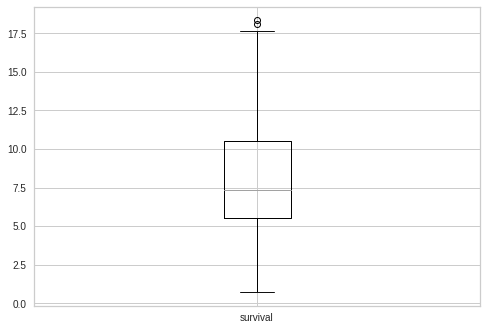

In [18]:
# checking if any outlier present in dataset 
data_subset.boxplot(column=["survival"])
plt.show()

* after seeing the plot, we can say that there is not more outliers present in varibale survival. This is just one graphical representation. 
> NOTE: I've observed other variable also, for outlier just that with intention to not increase teh size of the notebook i just deleted that part.

# 4. Variable Analysis

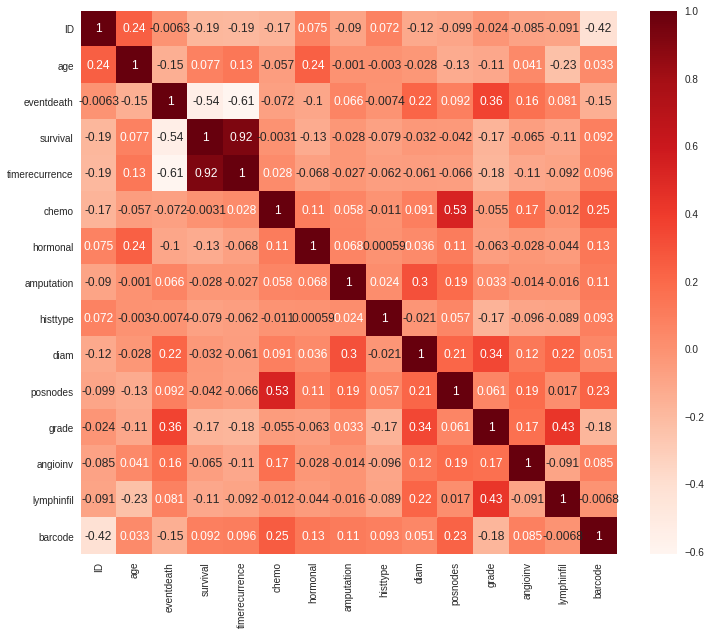

In [19]:
# Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data_subset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [20]:
#Correlation with output variable
corrTarget = abs(cor["eventdeath"])

#Selecting highly correlated features with Target Variable Total Profit
relevantFeatures = corrTarget[corrTarget>0.30]
relevantFeatures

eventdeath        1.000000
survival          0.540482
timerecurrence    0.608654
grade             0.359616
Name: eventdeath, dtype: float64

In [21]:
# checking correlation for entire dataset 
dataCorr = data_raw.corr()
corrTarget = abs(dataCorr["eventdeath"])
relevantFeaturesSet = corrTarget[corrTarget>0.35]
relevantFeaturesSet

eventdeath        1.000000
survival          0.540482
timerecurrence    0.608654
grade             0.359616
NM_003981         0.357250
NM_004701         0.363143
Contig55725_RC    0.364550
NM_018410         0.357570
NM_001168         0.362342
NM_001333         0.362378
Contig57584_RC    0.365952
Name: eventdeath, dtype: float64

* After visualizing the correlation between our independent and dependent variable, we can say that there are very few features which will be really helpful in the model building part.
  > Here, the most important feature is the 'timerecurrence', 'cause it posses the highest relation with our target variable.
  > Anyway, we'll move ahead what we have given(by firm - ref. notebook) already. 

In [22]:
# making a new dataset with above features. 
X_new = data_raw[['survival','timerecurrence','grade','NM_003981','NM_004701','Contig55725_RC','NM_018410','NM_001168','NM_001333', 'Contig57584_RC']]
X_new.head()

,survival,timerecurrence,grade,NM_003981,NM_004701,Contig55725_RC,NM_018410,NM_001168,NM_001333,Contig57584_RC
0,14.817248,14.817248,2,-0.409840,-0.578048,-0.698241,-0.532443,-0.617900,-0.430991,-0.401705
1,14.261465,14.261465,3,-0.361650,-0.387646,-0.592687,-0.358454,-0.680605,-0.368833,-0.399964
2,6.644764,6.644764,2,-0.097680,-0.236645,-0.739003,-0.132012,-0.374235,-0.292309,-0.095488
3,7.748118,7.748118,2,-0.526843,-0.642391,-0.708102,-0.605006,-0.790261,-0.421229,-0.475031
4,6.436687,6.318960,2,0.164245,-0.044142,-0.595015,-0.070410,-0.232505,-0.157765,-0.107824


# 5. Data Splitting

In [23]:
# data splitting
X = data_subset.drop(['Patient', 'ID', 'eventdeath'], axis=1)
y = data_subset['eventdeath']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
display(X.shape)
display(y.shape)

(272, 13)

(272,)

In [ ]:
print(y)

# 6. EDA 

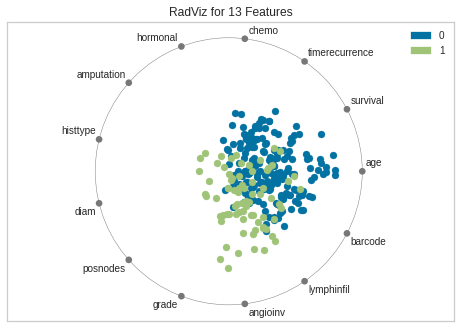

In [26]:
# visualise class separation
from yellowbrick.features.rankd import Rank2D 
from yellowbrick.features.radviz import RadViz 
from yellowbrick.features.pcoords import ParallelCoordinates 

classes = ['alive', 'dead']
features = X.columns
visualizer = RadViz(clases=classes, features=features)

#X_matrix = X.as_matrix()
#y_matrix = y.as_matrix()

X_matrix = X.to_numpy()
y_matrix = y.to_numpy()

visualizer.fit(X_matrix, y_matrix)
visualizer.transform(X_matrix)
visualizer.poof()

In [27]:
X["timerecurrence"].describe()

count    272.000000
mean       7.250433
std        4.177462
min        0.271047
25%        4.389459
50%        6.950034
75%        9.986311
max       18.340862
Name: timerecurrence, dtype: float64

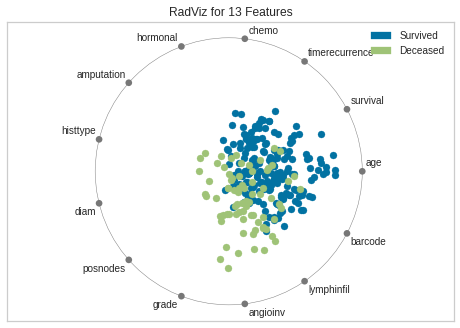

In [28]:
features = X.columns
class_labels = ["Survived", "Deceased"]
visualizer = RadViz(classes=class_labels, features=features)

visualizer.fit(X[features], y)
visualizer.transform(data_subset[features])
visualizer.poof()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


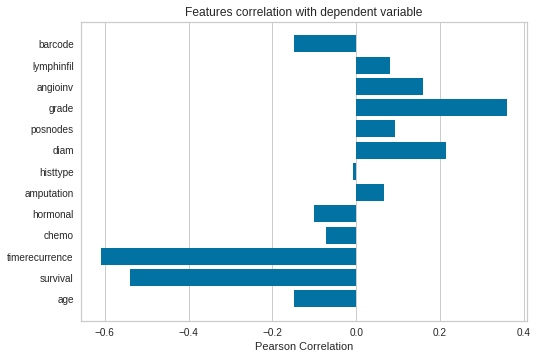

In [29]:
# Importing correlation package
from yellowbrick.target import FeatureCorrelation

visualizer = FeatureCorrelation(labels=features)
# Fitting data to the visualizer
visualizer.fit(X[features], y)  
visualizer.poof()   

# 7. Machine Learning

*  **A. RANDOM FOREST CLASSIFIER** 

In [30]:
# Model Training 
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier()
model_rfc

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
model_rfc.fit(X_train, y_train)
model_rfc_pred = model_rfc.predict(X_test)

In [32]:
# compute accuracy score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

model_rfc_acc_score = accuracy_score(y_test, model_rfc_pred)
print("Accuracy Randon Forest Classifier :", model_rfc_acc_score)
score = f1_score(y_test, model_rfc_pred)
print("RFC f-1 Score :", score)

Accuracy Randon Forest Classifier : 0.9555555555555556
RFC f-1 Score : 0.9230769230769231


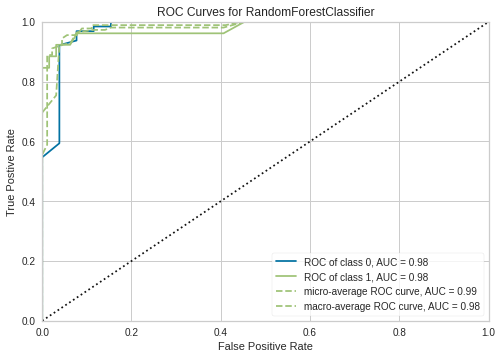

In [34]:
# plot ROC curve
from yellowbrick.classifier import ROCAUC

model_rfc_roc = ROCAUC(model_rfc)

model_rfc_roc.fit(X_train, y_train)
model_rfc_roc.score(X_test, y_test)
model_rfc_roc.poof()

*  **B. SUPPORT VECTOR CLASSIFIER**

In [35]:
# Model Training 
from sklearn.svm import SVC

svc_model = SVC(kernel="linear", random_state=101)
svc_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)

In [36]:
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)

In [37]:
# compute accuracy score
svc_acc_score = accuracy_score(y_test, svc_pred)
print("Accuracy - Support Vector Classifier :", svc_acc_score)
score = f1_score(y_test, svc_pred)
print("SVC f-1 Score :", score)

Accuracy - Support Vector Classifier : 0.8888888888888888
SVC f-1 Score : 0.8214285714285715


*GRID SEARCH CROSS VALIDATION*

>> Here, we're taking different candidate values to try. We're/I'm trying with different values, such as two valyes for gamma, and two kernels one is linear and another rbf. It will try all the values given and will gives the most accurate model.

>> Linear SVM is a parametric model, an RBF kernel SVM isn't..So, the rule of thumb is use linear SVMs (or logistic regression) for linear problems, and nonlinear kernels such as the Radial Basis Function kernel for non-linear problems.

In [42]:
from sklearn.model_selection import GridSearchCV

cv_parameter = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}]

# Create a classifier cv_parameter
clf = GridSearchCV(estimator=SVC(), param_grid=cv_parameter, n_jobs=-1)

# Train the classifier on data1's feature and target data
clf.fit(X_train, y_train)   

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [45]:
print('Best/Accuracy Score:', clf.best_score_) 

Best/Accuracy Score: 0.8957957957957957


* Accuracy - Support Vector Classifier : 0.8888888888888888
   * Grid Search CV Best/Accuracy Score: 0.8957957957957957
    - We can say that post GD CV accuracy has been improved a little bit.

In [46]:
print("Best Parameters :", clf.best_params_)

Best Parameters : {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}


*   **C. STOCHASTIC GRADIENT DESCENT CLASSIFIER**

In [47]:
# Model Training 
from sklearn.linear_model import SGDClassifier

model_sgdc = SGDClassifier(loss='modified_huber', shuffle=True, random_state=101)
model_sgdc.fit(X_train, y_train)
model_sgdc_pred = model_sgdc.predict(X_test)

In [48]:
# compute accuracy score
sgdc_acc_score = accuracy_score(y_test, model_sgdc_pred)
print("Accuracy - Stochastic Gradient Descent Classifier :", sgdc_acc_score)

Accuracy - Stochastic Gradient Descent Classifier : 0.7111111111111111


# Conclusion:
  * 1. After seeing the Accuracy scores of each classifier here, and the accuracy score of the model given in the pre notebook (reference). We can say that Random Forest Classifier outperforms all. 

# 3. Challenges In Data Science Projects

1. Understanding Case study and setting clear objectives.
2. Data Preparation
3. Selecting best features (Feature Selection)
4. Handling outliers 
5. Communication with stakeholders (Non-Technical)
6. Office Politics

